COMP 472 - Decision Trees COMP 6721 Applied Artificial Intelligence

Write a Python program that uses scikit-learn’s Decision Tree Classifier:

# Question 1 
Given the training instances below, use information theory to find whether
‘Outlook’ or ‘Windy’ is the best feature to decide when to play a game of golf.

In [60]:
import numpy as np
dataset = np.array([
['sunny', 85, 85, 0, 'Don\'t Play'],
['sunny', 80, 90, 1, 'Don\'t Play'],
['overcast', 83, 78, 0, 'Play'],
['rain', 70, 96, 0, 'Play'],
['rain', 68, 80, 0, 'Play'],
['rain', 65, 70, 1, 'Don\'t Play'],
['overcast', 64, 65, 1, 'Play'],
['sunny', 72, 95, 0, 'Don\'t Play'],
['sunny', 69, 70, 0, 'Play'],
['rain', 75, 80, 0, 'Play'],
['sunny', 75, 70, 1, 'Play'],
['overcast', 72, 90,1, 'Play'],
['overcast', 81, 75, 0, 'Play'],
['rain', 71, 80, 1, 'Don\'t Play'],
])
print(dataset)

[['sunny' '85' '85' '0' "Don't Play"]
 ['sunny' '80' '90' '1' "Don't Play"]
 ['overcast' '83' '78' '0' 'Play']
 ['rain' '70' '96' '0' 'Play']
 ['rain' '68' '80' '0' 'Play']
 ['rain' '65' '70' '1' "Don't Play"]
 ['overcast' '64' '65' '1' 'Play']
 ['sunny' '72' '95' '0' "Don't Play"]
 ['sunny' '69' '70' '0' 'Play']
 ['rain' '75' '80' '0' 'Play']
 ['sunny' '75' '70' '1' 'Play']
 ['overcast' '72' '90' '1' 'Play']
 ['overcast' '81' '75' '0' 'Play']
 ['rain' '71' '80' '1' "Don't Play"]]


In [61]:
import pandas as pd
df2 = pd.DataFrame(dataset,
                   columns=['Outlook', 'Temperature', 'Humidity','Windy','Play / Don’t Play'])
blankIndex=[''] * len(df2)
df2.index=blankIndex
df2

,Outlook,Temperature,Humidity,Windy,Play / Don’t Play
,sunny,85,85,0,Don't Play
,sunny,80,90,1,Don't Play
,overcast,83,78,0,Play
,rain,70,96,0,Play
,rain,68,80,0,Play
,rain,65,70,1,Don't Play
,overcast,64,65,1,Play
,sunny,72,95,0,Don't Play
,sunny,69,70,0,Play
,rain,75,80,0,Play


EXERCISE 1

In [62]:
from sklearn import tree
from sklearn import preprocessing

NameError: name 'df' is not defined

For our feature vectors, we need the first four columns and for the training labels, we use the last column from the dataset:


In [63]:
X = dataset[:, 0:4]
y = dataset[:, 4]

However, you will not be able to use the data as-is: All features must be
numerical for training the classifier, so you have to transform the strings into
numbers. Fortunately, scikit-learn has a preprocessing class for label encoding
that we can use:

In [64]:
le = preprocessing.LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
y = le.fit_transform(y)

Now you can create a classifier object:

In [65]:
dtc = tree.DecisionTreeClassifier(criterion="entropy")

Note that we are using the entropy option for building the tree, which is the
method we’ve studied in class and used on the exercise sheet. Train the classifier
to build the tree:


In [66]:
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Now you can predict a new value using dtc.predict(test). Note: if you want the string output that
you transformed above, you can use the inverse_transform(predict) function
of a label encoder to change the predicted result back into a string.

In [67]:
y_pred = dtc.predict([[2, 81, 95, 1]])
print("Predicted output: ", le.inverse_transform(y_pred))

Predicted output:  ["Don't Play"]


You can also print the tree:

[Text(0.5714285714285714, 0.9166666666666666, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.42857142857142855, 0.75, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7142857142857143, 0.75, 'x[1] <= 77.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5714285714285714, 0.5833333333333334, 'x[1] <= 73.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.42857142857142855, 0.4166666666666667, 'x[1] <= 70.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2857142857142857, 0.25, 'x[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.14285714285714285, 0.08333333333333333, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.42857142857142855, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7142857142857143, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8571428571428571, 0.5833333333333334,

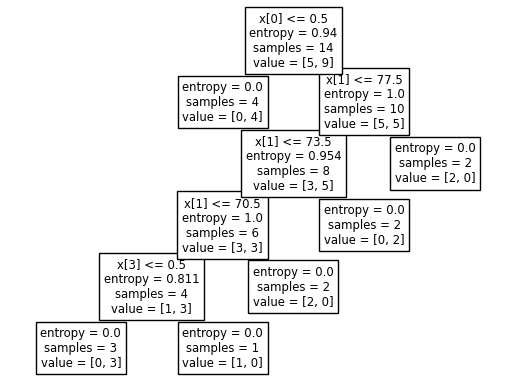

In [68]:
tree.plot_tree(dtc)

but this can be a bit hard to read; to get a prettier version you can use the
Graphviz visualization software, which you can call from Python like this:

In [42]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None,
feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'],
class_names=le.classes_,
filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("mytree2")

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

The result will be stored in a file mytree.pdf 

EXERCISE 2 

Let’s start working with some “real” data: scikit-learn comes with a number of
example datasets, including the Iris flower dataset. If you do not know this
dataset, start by reading https://en.wikipedia.org/wiki/Iris_flower_data_
set.


In [43]:
from sklearn import tree
from sklearn.datasets import load_iris
# load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.6, random_state=0)
# create and print the decision tree
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)
tree.plot_tree(dtc)

NameError: name 'train_test_split' is not defined

In [44]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None,
feature_names=iris.feature_names,
class_names=iris.target_names,
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iristree")


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Now you have to evaluate the performance of your classifier. Use scikitlearn’s train_test_split helper function5
to split the Iris dataset into
a training and testing subset, as discussed in the lecture. Now run an
evaluation to compute the Precision, Recall, F1-measure, and Accuracy
of your classifier using the evaluation tools in scikit-learn.


To create an 80%/20% split of the training/testing data, use:

scikit-learn has a helper function to produce a report for all the metrics,
classification_report:

In [4]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


NameError: name 'dtc' is not defined

As you can see, the data was easy to learn and your classifier has a perfect
score. Try decreasing the training data to just 50% of the dataset to see
some errors.
Note: Since we have more than two classes, the above metrics are an
average of the values for each individual class.


Finally, compute and print out the confusion matrix.

In [5]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

NameError: name 'y_test' is not defined